In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path().resolve().parent))

In [2]:
import numpy as np
from numpy.random import default_rng

def generate_noisy_sine(x_min, x_max, num_x):
    rng = default_rng(0)
    x_train = [[rng.uniform(x_min, x_max)] for _ in range(num_x)]
    y_train = [np.sin(np.pi*x[0]) for x in x_train]
    mag_noise = 0.01
    y_train += mag_noise * rng.random(num_x)
    return np.array(x_train), np.array(y_train)

In [3]:
x_min = -1.0
x_max = 1.0
num_x = 1000
x_train, y_train = generate_noisy_sine(x_min, x_max, num_x)
x_test, y_test = generate_noisy_sine(x_min, x_max, num_x)

In [4]:
from scikit_quri.qsvm import QSVR
from scikit_quri.circuit import create_ibm_embedding_circuit

n_qubit = 4
circuit = create_ibm_embedding_circuit(n_qubit)
qsvm = QSVR(circuit)
qsvm.fit(x_train, y_train)
y_pred = qsvm.predict(x_test)

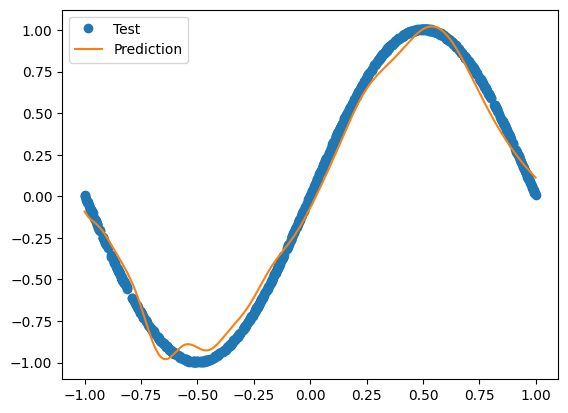

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_test, y_test, "o", label="Test")
plt.plot(np.sort(np.array(x_test).flatten()), np.array(y_pred)[np.argsort(np.array(x_test).flatten())], label="Prediction")
plt.legend()
plt.show()